(300L, 2L)
[[ 1.84207953  4.6075716 ]
 [ 5.65858312  4.79996405]
 [ 6.35257892  3.2908545 ]
 [ 2.90401653  4.61220411]
 [ 3.23197916  4.93989405]]


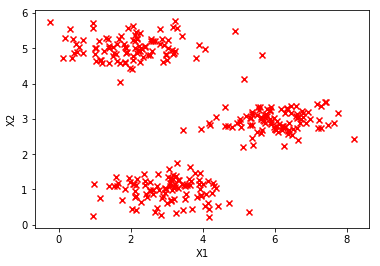

In [1]:
#本文是kmeans算法的实现
#load data
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

data = sio.loadmat('ex7data2.mat')
X = data['X']
print X.shape
print X[:5]


plt.scatter(X[:,0],X[:,1],marker='x',color = 'r')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [3]:
import numpy as np
#计算距离
def computeDistance(A,B):
    return np.sqrt(np.sum(np.square(A-B)))
#为数据集x找到最近的质心   
def findClosestCentroids(x,centroids):
    k = centroids.shape[0]
    m = x.shape[0]
    idx = np.zeros((x.shape[0],1))
    for i in range(m):
        minDist = np.inf
        minIndex = -1
        for j in range(K):
            distance = computeDistance(x[i,:],centroids[j,:])
            if distance<minDist:
                minDist = distance
                minIndex = j
        idx[i,:] = minIndex
    return idx
    
#用初始值测试一下
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X,initial_centroids)
print "should be 1,3,2\n",idx[:3]


should be 1,3,2
[[ 0.]
 [ 2.]
 [ 1.]]


In [4]:
#compute the mean of the data ,it is centroids
#计算data的均值，改变centroids
def change_centroids(x,idx,K):
    m,n = x.shape
    centroids = np.zeros((K,n))
    for i in range(K):
        index = np.where(idx.ravel() == i)
        centroids[i] = np.mean(x[index],axis=0)
    return centroids

#测试一下
print "Centroids computed after initial finding of closest centroids: \n"
print 'the centroids should be\n [ 2.428301 3.157924 ]\n' \
      '[ 5.813503 2.633656 ]\n [ 7.119387 3.616684 ]\n'

centroids = change_centroids(X,idx,K)
print centroids

        
    
    


Centroids computed after initial finding of closest centroids: 

the centroids should be
 [ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
 [ 7.119387 3.616684 ]

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]


In [5]:
#我们一开始应该随机初始化centroids
def randCentroids(x,k=3):
    m,n = x.shape
    centroids = np.zeros((k,n))
    randIndex = np.random.choice(m,k)
    centroids = x[randIndex]
    return centroids
#定义kmeans class  
class Kmeans(object):
    def __init__(self):
        pass
    def runKmeans(self,data,init_centroids,iers=10,k=3):
        idx = None
        centroids = None
        for i in range(iers):
            idx = findClosestCentroids(data,init_centroids)
            centroids = change_centroids(data,idx,k)
            init_centroids = centroids
        return idx,centroids


    

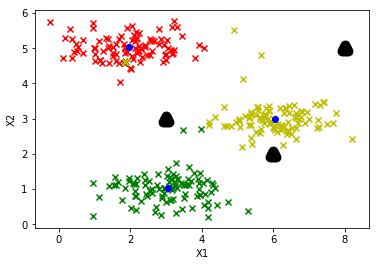

In [13]:
#用初始化的centroids测试一下结果，大黑点是初始化的centroids
kmeans = Kmeans()
#we use the initial centroids[3,3],[6,2],[8,5]
idx,centroids = kmeans.runKmeans(X,initial_centroids)
idx0 = np.where(idx==0)
idx1 = np.where(idx==1)
idx2 = np.where(idx==2)
plt.scatter(X[idx0,0],X[idx0,1],marker='x',color = 'r')
plt.scatter(X[idx1,0],X[idx1,1],marker='x',color = 'g')
plt.scatter(X[idx2,0],X[idx2,1],marker='x',color = 'y')
plt.scatter(centroids[:,0],centroids[:,1],marker='o',color = 'b')
plt.scatter(initial_centroids[:,0],initial_centroids[:,1],\
            marker='^',color = 'black',linewidths=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



[[ 6.99198434  2.98706729]
 [ 2.15520661  0.80696562]
 [ 4.8255341   2.77961664]]


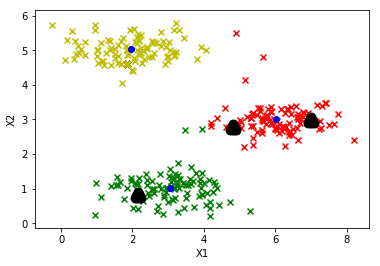

In [14]:
#we use rand centroids 
#然后我们用随机的初始化的centroids测试一下
rand_centroids = randCentroids(X,k=3)
print rand_centroids
idx,centroids = kmeans.runKmeans(X,rand_centroids)
idx0 = np.where(idx==0)
idx1 = np.where(idx==1)
idx2 = np.where(idx==2)
plt.scatter(X[idx0,0],X[idx0,1],marker='x',color = 'r')
plt.scatter(X[idx1,0],X[idx1,1],marker='x',color = 'g')
plt.scatter(X[idx2,0],X[idx2,1],marker='x',color = 'y')
plt.scatter(centroids[:,0],centroids[:,1],marker='o',color = 'b')
plt.scatter(rand_centroids[:,0],rand_centroids[:,1],\
            marker='^',color = 'black',linewidths=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()